<a href="https://colab.research.google.com/github/GuidoGuarda/machinelearning/blob/main/ml_pln_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# IA - Conceito
### Inteligência Artificial (IA) é a tecnologia que permite a máquinas e sistemas realizarem tarefas que normalmente exigiriam a inteligência humana, como reconhecer padrões, tomar decisões, resolver problemas, entender linguagem natural e até aprender com a experiência e com erros.

# Machine Learning -  Conceito

#### Machine Learning é uma área da IA onde computadores aprendem com dados, analisam padrões e melhoram suas decisões de forma autônoma, sem precisar de programação detalhada.

### Machine Learning (Aprendizado de Máquina) é uma parte da Inteligência Artificial onde os computadores aprendem sozinhos a partir de dados. Em vez de serem programados para fazer tudo passo a passo, eles analisam informações, encontram padrões e melhoram suas respostas ou decisões com o tempo, sem a necessidade de intervenção humana direta. É como ensinar um computador a "aprender" com a experiência, assim como fazemos. Exemplos incluem filtros de spam de e-mail ou sistemas de recomendação em lojas online.


# Situação Problema de Aprendizagem

1. Temos um dataset com 50 mil filmes.
2. As resenhas foram traduzidas por um membro da comunidade Kaggle.
3. O dataset possui uma coluna, chamada "sentiment", essa coluna tem os seguintes valores: neg e pos.
4. Variável qualitativa nominal: text_en, text_pt, sentiment (ruim - neg), (bom - pos).

Analisar sentimentos em resenhas de filmes, o dataset terá 50.000 filmes para serem analisados. O dataset possui uma coluna alvo que é o sentimento (pos - positivo e neg - negativo).

NO final, devemos treinar um modelo de regressão logística, mas antes de entender e transformar o texto em um espaço vetorial (números). Para isso, ultilizaremos técnicas de Bag Of Word (sacola de palavras). Nosso objetivo é treinar um modelo que tenha pelo menos 60% de acurácia.

Devemos também relembrar  o Word Cloud (Nuvem de palavras) para categorizar nosso texto (corpus).
Utilizaremos outras técnicas e visualização em gráficos, essas técnicas téra como objetivo aumentar a qualidade do modelo.

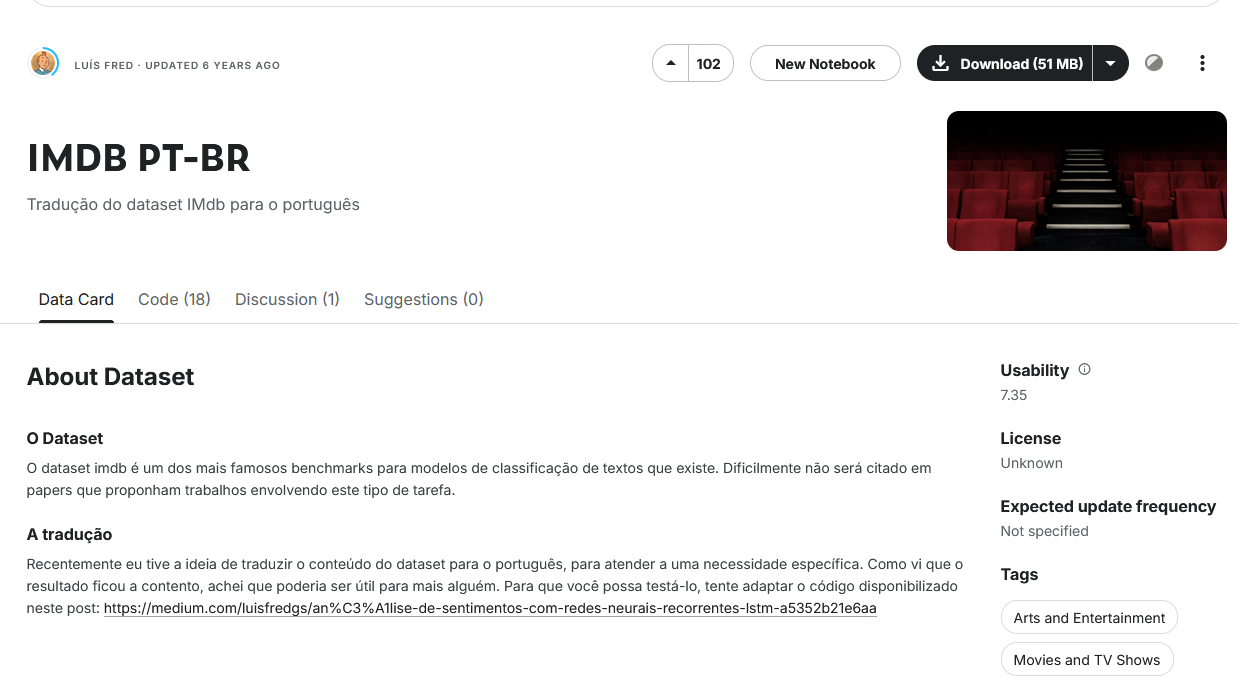

https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr

## DATASET no Kaggle

In [46]:
! pip install pandas

In [47]:
import pandas as pd

In [48]:

# Try to read the CSV, handling potential errors
try:
    df_resenhas = pd.read_csv('/content/sample_data/imdb-reviews-pt-br.csv')
except pd.errors.ParserError as e:
    # If a ParserError occurs, try reading with error_bad_lines=False
    print(f"Error reading CSV: {e}")
    print("Trying to read with error_bad_lines=False to skip problematic lines...")
    df_resenhas = pd.read_csv('/content/sample_data/imdb-reviews-pt-br.csv', error_bad_lines=False)
    print("Successfully read the CSV, but some lines may have been skipped.")

# Now you can work with the df_resenhas DataFrame

In [49]:
df_resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


Análise do DataSet:
- Os índices do dataframe antecedem a coluna id.
- text_en: é uma coluna que contém um texto em inglês
- text_pt: é uma coluna em inglês só que traduzida para português
- sentimnet: mostra um sentimento de texto, sendo neg(negativo) e pos (positivo)

Análise das Variáveis

- **text_en**: qualitativa nominal
- **text_pt**: qualitativa nominal
- **sentiment**: qualitativa

In [50]:
df_resenhas.tail()

,id,text_en,text_pt,sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


# Relembrando Pandas

In [51]:
# RESENHA 189
# Acessando a linha pela posição numérica
print("Negativa \n")
print(df_resenhas.text_pt[188])


Negativa 

O filme é uma canção de ninar feliz, foi feito para nos fazer dormir. E é isso que fazemos, enquanto sonhamos com a bela Natasha Henstridge. Nenhum roteiro, nenhum personagem profundo, nada de especial. Então, vamos dormir.


In [52]:
# RESENHA 49002
print("Positivo \n")
print(df_resenhas.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [64]:
# QUANTIDADE DE SENTIMENTOS
quantidade = df_resenhas['sentiment'].count()
print(quantidade)


49459


In [67]:
# QUANTIDADE DE SENTIMENTO DISCRIMINANDO POR VALORES
print(df_resenhas.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [54]:
# TODAS AS INFORMAÇÕES DO DATAFRAME
print(df_resenhas)


          id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori... 

In [55]:
# INFORMAÇÕES
df_resenhas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [56]:
# DESCRIÇÃO
df_resenhas.describe()


,id
count,49459.000000
mean,24730.960917
std,14277.792868
min,1.000000
25%,12366.500000
50%,24731.000000
75%,37095.500000
max,49460.000000


In [57]:
# COLUNAS DO DATAFRAME
df_resenhas.columns


Index(['id', 'text_en', 'text_pt', 'sentiment'], dtype='object')

# Machine Learning

scikit-learn
Machine Learning in Python

Documentação: https://scikit-learn.org/stable/

- Ferramentas simples e eficientes para análise preditiva de dados
- Acessível a todos e reutilizável em vários contextos
- Construído em NumPy, SciPy e matplotlib
- Código aberto, comercialmente utilizável - licença BSD


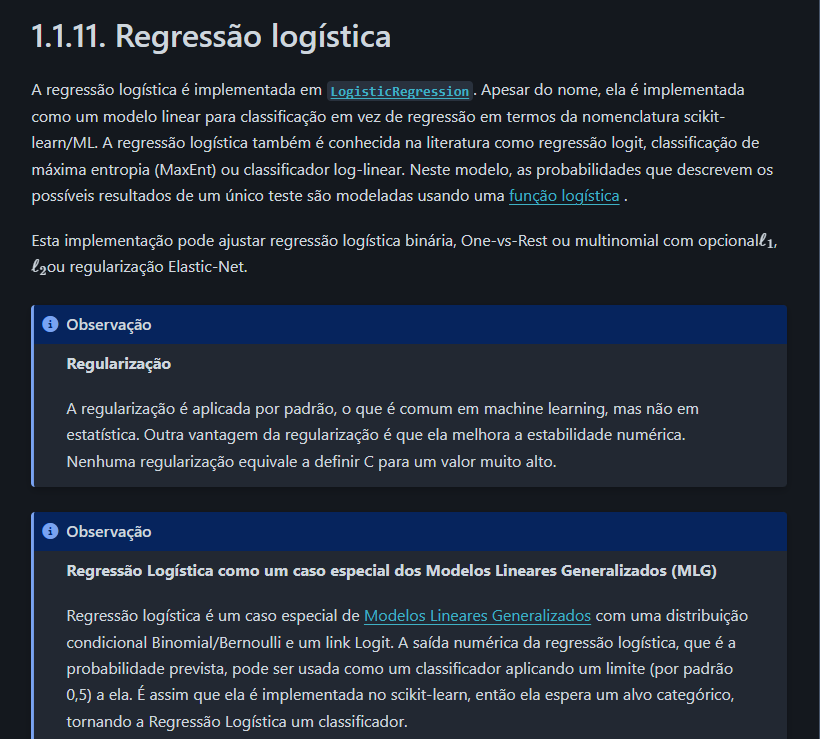

# Machine Learning

Inteligència artifical é um conceito geral, resumidamente são máquinas que imitam os seres humanos.
A inteligência artificial é dividida em duas grandes categorias:

* Machine Learning: Modelos Preditivos (Modelos que vão prever alto)
* Deep Learning: Modelo de redes neurais (ex: visão computacional - CNN)

- Machine Learning Supervisionado: rotulos(labels)
-  Algoritimo escolher?

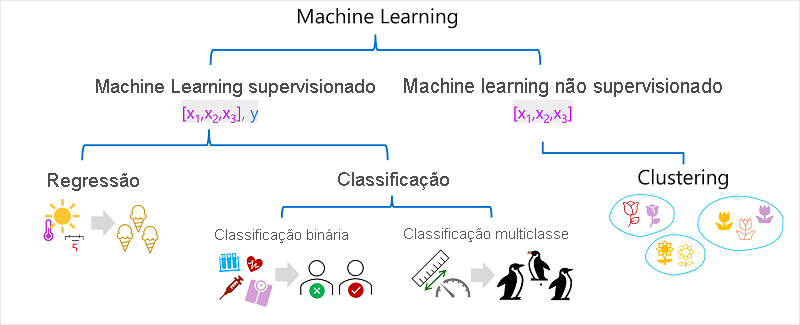



# Escolhemos Machine Learning Supervisionado - Classificação.
## Qual algoritimo escolher


| **Método**                   | **Descrição**                                                                 | **Quando Usar**                                                | **Exemplo**                                                        |
|------------------------------|-------------------------------------------------------------------------------|--------------------------------------------------------------|--------------------------------------------------------------------|
| **Regressão Linear Simples** | Modela a relação entre uma variável dependente e uma independente usando uma linha reta. | Quando há uma relação linear clara entre duas variáveis.    | Prever o preço de uma casa com base em sua área.                  |
| **Regressão Linear Múltipla** | Extensão da regressão linear simples que usa várias variáveis independentes. | Quando várias variáveis influenciam a variável dependente.  | Prever o preço de uma casa com área, localização e número de quartos. |
| **Regressão Polinomial**     | Modela a relação usando um polinômio de grau n.                             | Quando a relação entre as variáveis é não linear.           | Prever vendas com base no tempo, onde a relação é curva.          |
| **Árvore de Decisão**        | Estrutura hierárquica que faz decisões baseadas em perguntas sobre os dados. | Para classificação e regressão, especialmente com dados categóricos. | Classificar se um e-mail é spam ou não baseado em palavras-chave.  |
| **Regressão Logística**      | Modela a probabilidade de um evento binário.                                | Quando a variável dependente é categórica (sim/não).        | Prever se um cliente comprará ou não um produto.                  |
| **Naive Bayes**              | Classificação baseada no teorema de Bayes, assumindo independência entre variáveis. | Para tarefas de classificação, especialmente com texto.     | Classificar sentimentos em análises de produtos.                   |


variavel independente (depende de outras variaveis)
variavel dependente (variavel alvo)

# Treino e Teste

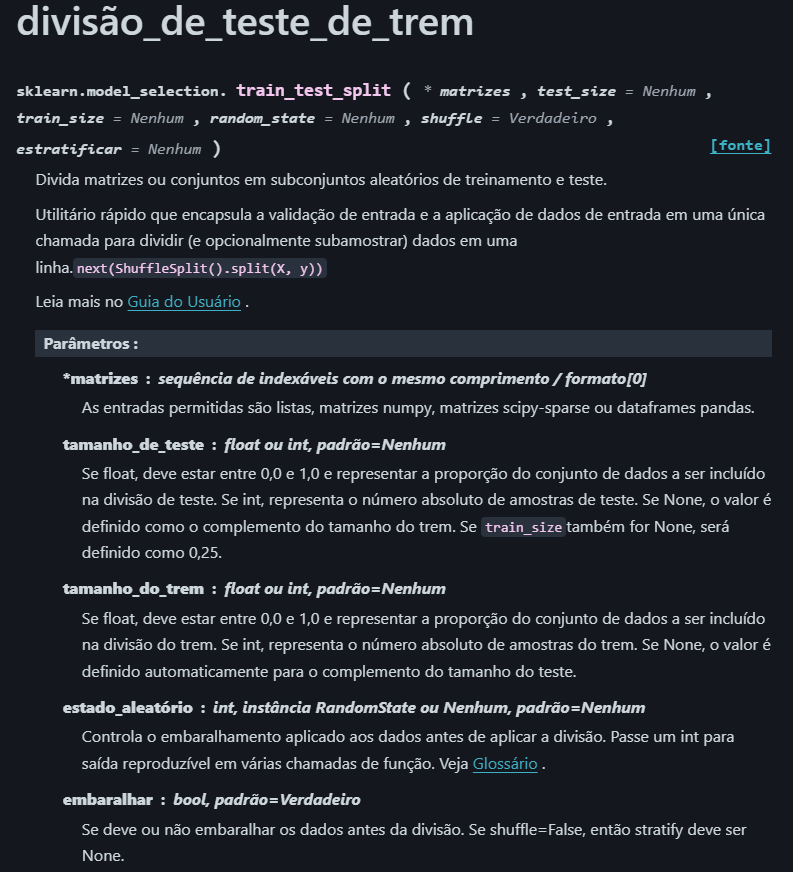

Separar ou segregar.
70 - treinar
30 - avaliar (esconder)


Documentação:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [69]:
# Importação

from sklearn.model_selection import train_test_split

# definir variáveis de treino e de teste
# random_state: passe um int para embaralhamento
# criando variáveis
treino, teste, classe_treino, classe_teste = train_test_split(df_resenhas.text_pt,
                                                              df_resenhas.sentiment,
                                                              random_state=42)


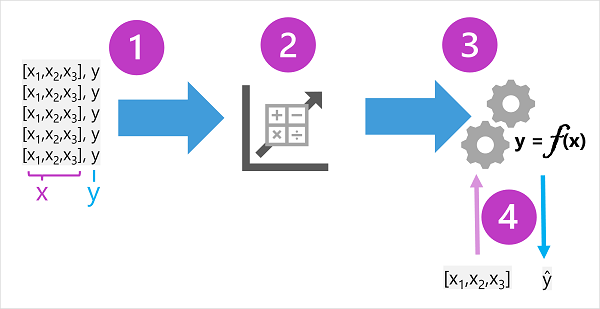


In [60]:
# Verificando Treino
treino

,text_pt
1348,"Embora o filme tenha sido apenas assim, o clos..."
27466,Este é provavelmente um dos piores filmes que ...
29998,"De vez em quando, um filme irá varrer ao seu r..."
48186,Este é um conto completamente diabólico de quã...
26473,"Lenta, chata, extremamente repetitiva. Não adm..."
...,...
11284,Naach teria ganhado um Razzie para o Pior Film...
44732,Apenas assisti a esse filme em DVD e achei a a...
38158,Melhor show desde Seinfeld. Ela é realmente mu...
860,Eu pareço estar discordando com muitas pessoas...


In [61]:
# Verificando Teste
teste

,text_pt
12532,Isso era incomum: um filme moderno que era ult...
35445,Alguns dos meus velhos amigos sugeriram que eu...
20279,Que prazer. Isto é realmente uma paródia. Some...
2969,"Há cerca de dez minutos a meio da Strangeland,..."
45161,"Otelo, a clássica história de Shakespearen sob..."
...,...
16421,"Crescendo como filho do cinema, uma das trilog..."
39861,Este filme é o melhor filme de todos os tempos...
309,"""Electra Glide in Blue"" é um movimento lento e..."
20638,Eu amo esse filme ! Eu acho que já vi 5 vezes ...


In [62]:
df_resenhas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [70]:
classe_treino

,sentiment
1348,neg
27466,neg
29998,neg
48186,pos
26473,neg
...,...
11284,neg
44732,pos
38158,pos
860,neg


In [71]:
# Mostrando os Rótulos (labels) de treino
classe_teste

,sentiment
12532,pos
35445,neg
20279,pos
2969,neg
45161,pos
...,...
16421,pos
39861,pos
309,neg
20638,pos


# Relebrando
- Variável dependente: nosso alvo (Observada no experimento)
- Variável independente: influênciam o resultado.

Exemplo:
Estudo: Impacto da temperatura na taxa de crescimento de plantas.

independente: temperatura (a temperatura a que as plantas são expostas)
dependente: taxa de crescimento das plantas.

Qual a diferença entre a regressão linear e logística?

- Na regressão linear, a linha de regressão é reta. Qualquer alteração em uma variável independente afeta diretamente a variável dependente.
-  Na regressão logística, a linha de regressão é uma curva em forma de S, também conhecida como curva sigmoide.

O que são Bag Of Words?

Bag of Words (BOW), ou "saco de palavras" em português, é um método para extrair recursos de textos e representá-los como uma lista de palavras únicas, sem repetições.

o que são matriz esparsa?

Uma matriz é considerada esparsa quando a maioria de seus elementos são zeros ou não estão presentes.

Princípio de Pareto(teoria e gráficos)

O Princípio de Pareto, também conhecido como regra 80/20, é uma técnica de organização que afirma que 80% dos resultados de um trabalho são provenientes de 20% das causas